## Program do zliczania statystyk siatkarskich z meczu i ich wizualizacji
##### Program przyjmuje cztery pliki .csv z danymi z meczu (dotyczące przyjęcia, zagrywki, ataku i bloku). Każdy zawodnik, który brał udział w danym elemencie gry ma w danym pliku swoją kolumnę, w której wartości odpowiadają jakości wykonania danej akcji (opis danych wejściowych poniżej).  
##### Następnie tworzone są tabele opisujące dany element gry i na ich podstawie powstają wykresy pokazujące wizualnie statystyki meczowe.
##### Program zwraca pliki .jpeg i .pdf z wszystkimi statystykami i  wizualizacjami.

### Opis danych wejściowych:
1. Przyjęcie:
  - -1: Błąd lub piłka przechodząca
  - 0: Złe
  - 1: Neutralne
  - 2: Dobre
  - 3: Perfekcyjne
  
2. Zagrywka:
  - -1: Błąd
  - 0: Przyjęcie poprawne
  - 1: Złe przyjęcie
  - 2: As


3. Atak:
  - -2: Zablokowany
  - -1: Błąd
  - 0: Nieskończony
  - 1: Nieskończony, ale atakujący zrobił wszystko co mógł ze złej piłki
  - 2: Punktowy

4. Blok:
  - 0: Dobry wyblok
  - 1: Blok punktowy
  
### Potrzebne biblioteki

In [1]:
#Potrzebne biblioteki
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

### Wczytanie danych
Z plików wczytywane są dane będące zliczonymi i ocenionymi akcjami zawodników z meczu według kryteriów znajdujących się powyżej. Ze względu na różne ilości danych dla każdego zawodnika (np. jeden zawodnik więcej atakował niż drugi), puste miejsca w danych zapełniamy wartościami NaN.

In [4]:
#Przyjęcie:
p = pd.read_csv('Przyjęcie.csv', sep=';', header=0)
p = p.applymap(lambda x: int(x) if pd.notna(x) and x != '' else np.nan)

#Atak:
at = pd.read_csv('Atak.csv', sep=';', header=0)
at = at.applymap(lambda x: int(x) if pd.notna(x) and x != '' else np.nan)

#Zagrywka:
zgr = pd.read_csv('Zagrywka.csv', sep=';', header=0)
zgr = zgr.applymap(lambda x: int(x) if pd.notna(x) and x != '' else np.nan)

#Blok:
bl = pd.read_csv('Blok.csv', sep=';', header=0)
bl = bl.applymap(lambda x: int(x) if pd.notna(x) and x != '' else np.nan)

at

,Michał F,Żenia,Bajer,Tomek,Michał T,Kelly,Krzysiek
0,2.0,-2.0,2,-2.0,0.0,-1.0,1.0
1,1.0,2.0,2,0.0,1.0,2.0,1.0
2,-1.0,-2.0,2,1.0,0.0,0.0,NaN
3,-1.0,1.0,1,1.0,0.0,NaN,NaN
4,NaN,2.0,0,-1.0,1.0,NaN,NaN
5,NaN,2.0,2,2.0,NaN,NaN,NaN
6,NaN,2.0,2,-2.0,NaN,NaN,NaN
7,NaN,-2.0,2,1.0,NaN,NaN,NaN
8,NaN,2.0,0,0.0,NaN,NaN,NaN
9,NaN,0.0,2,2.0,NaN,NaN,NaN


### Statystyki przyjęcia
Na początku powstaje lista przechowująca imiona zawodników. Będzie potrzebna do finalnej tabeli jako nazwy kolumn. Następnie liczone są ilości przyjęć każdego zawodnika i całej drużyny w celu policzenia % dobrych i złych przyjęć oraz wyliczenia współczynnika dobrego przyjęcia (współczynniki powstały używając metody prób i błędów, tak by jak najlepiej oddawały jakość i ilość danej statystyki u zawodnika). W kolejnym kroku w pętli wyliczane są te statystyki dla każdego gracza. Za pozytywne przyjęcie uznaje się zarówno perfekyjne jaki dobre, a za błędy błędy oraz złe przyjęcia. W końcowym kroku powstaje tabela pokazująca produkt finalny. Zawodnicy w niej zawarci posortowani są w kolejności od zawodnika z największą ilością przyjęć.

In [5]:
#Wyciągnięcie imion graczy
players_p = list(p.columns)

#Policzenie poszczególnych rang przyjęcia dla każdego gracza
#Wszystkie przyjęcia zawodnika
suma_p = list(p.count())

#Wszystkie przyjęcia drużyny
suma_w_p = sum(suma_p)

#Przyjęcia perfekcyjne
perf = list(p[p==3].count())

#Dobre przyjęacia
dobre_p = list(p[p==2].count())

#Przyjęcia neutralne
neu_p = list(p[p==1].count())

#Złe przyjęcie
zle_p = list(p[p==0].count())

#Oddanie piłki i błędy
bledy_p = list(p[p==-1].count())

#Wyliczenie procentów pozytywnego (perfekcyjne+dobre) i negatywnego przyjęcia oraz współczynnika dobrego przyjęcia
per_good = []
per_bad = []
wsp = []

for i in range(len(dobre_p)) :
    per_good.append((perf[i]+dobre_p[i])/suma_p[i]*100)
    per_good[i] = round(per_good[i], 1)
    per_bad.append((bledy_p[i]+zle_p[i])/suma_p[i]*100)
    per_bad[i] = round(per_bad[i], 1)
    wsp.append((3*perf[i] + 2*dobre_p[i] + 0.25*neu_p[i] - zle_p[i] - 4*bledy_p[i]+0.5)*2/7/suma_w_p*100)
    wsp[i] = round(wsp[i], 2)
    
#Utworzenie Data Frame z Statystykami przyjęcia
rangi = [suma_p, perf, dobre_p, neu_p, zle_p, bledy_p, per_good, per_bad, wsp]
idx = ["Wszystkie", "Perfekcyjne", "Dobre", "Neutralne", "Złe", "Błędy", "% Pozytywnego", "% Błędów", "WSP"]

p1 = pd.DataFrame(rangi, columns=players_p, index = idx)
p1 = p1.sort_values(by=p1.index[0], axis=1, ascending=False)
p1

,Misza,Bajer,Tomek,Michał T,Kelly
Wszystkie,16.00,15.00,14.00,1.0,1.00
Perfekcyjne,1.00,6.00,2.00,0.0,0.00
Dobre,4.00,4.00,1.00,0.0,0.00
Neutralne,2.00,1.00,3.00,0.0,1.00
Złe,5.00,2.00,4.00,1.0,0.00
Błędy,4.00,2.00,4.00,0.0,0.00
% Pozytywnego,31.20,66.70,21.40,0.0,0.00
% Błędów,56.20,26.70,57.10,100.0,0.00
WSP,-5.47,10.18,-6.53,-0.3,0.46


### Wizualizacje statystyk przyjęcia
Powstają trzy wykresy:
- Wykres kołowy pokazujący rozkład ilości przyjmowanych piłek w meczu
- Wykres słupkowy, który dodatkowo dzieli jakość przyjęcia u zawodników na osobne słupki
- Wykres słupkowy współczynnika dobrego przyjęcia u zawodników

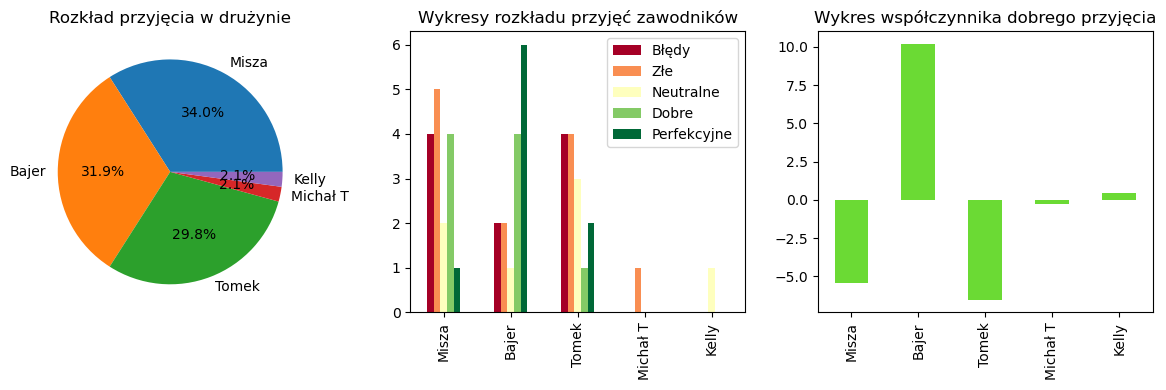

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Pieplot dla rozkładu przyjęć
axs[0].pie(p1.loc["Wszystkie"], labels = p1.columns, autopct='%1.1f%%')
axs[0].set_title('Rozkład przyjęcia w drużynie')

#Zestawienie rang przyjęć każdego zawodnika na jednym wykresie
p1.loc[["Błędy", "Złe", "Neutralne", "Dobre", "Perfekcyjne"]].T.plot(kind="bar", ax=axs[1], colormap='RdYlGn')
axs[1].set_title('Wykresy rozkładu przyjęć zawodników')

#Wykres słupkowy WSP przyjęcia
p1.loc["WSP"].plot(kind="bar", ax=axs[2], color="#6BDA34")
axs[2].set_title('Wykres współczynnika dobrego przyjęcia')

# Dostosowanie układu
plt.tight_layout()

# Pokaż wykres
plt.show()

### Statystyki zagrywki
Tabela powstaje dokładnie tak samo jak ta dotycząca przyjęcia. Pozytywna zagrywka to asy + dobre zagrywki.

In [7]:
#Policzenie poszczególnych rang zagrywki dla każdego gracza
#Wyciągnięcie imion zawodników
z_players = list(zgr.columns)

#Wszystkie zagrywki zawodnika
suma_z = list(zgr.count())

#Wszystkie zagrywki drużyny
suma_w_z = sum(suma_z)

#Asy
asy = list(zgr[zgr==2].count())

#Dobre zagrywki (nie asy)
dobra_zgr = list(zgr[zgr==1].count())

#Neutrlana zagrywka
neutr_zgr = list(zgr[zgr==0].count())

#Błędy
zle_zgr = list(zgr[zgr==-1].count())

#Wyliczenie procentów pozytywnej (as+dobre) i błędów w zagrywce oraz współczynnika dobrej zagrywki
pozytywna_zgr = []
bledy_zgr = []
wsp_zgr = []

for i in range(len(asy)) :
    pozytywna_zgr.append((asy[i] + dobra_zgr[i]) / suma_z[i] * 100 )
    pozytywna_zgr[i] = round(pozytywna_zgr[i], 1)
    bledy_zgr.append(zle_zgr[i]/suma_z[i] * 100)
    bledy_zgr[i] = round(bledy_zgr[i], 1)
    wsp_zgr.append((4*asy[i]+2*dobra_zgr[i]+neutr_zgr[i]-3*zle_zgr[i]-0.5)*2/7/suma_w_z*100)
    wsp_zgr[i] = round(wsp_zgr[i], 2)

#Utworzenie Data Frame z kolumnami zawodników i wierszami statystyk
rangi_zgr = [suma_z, asy, dobra_zgr, neutr_zgr, zle_zgr, pozytywna_zgr, bledy_zgr, wsp_zgr]
idx_zgr = ["Wszystkie", "Asy", "Dobre", "Neutralne", "Błędy", "% Pozytywnej", "% Błędów", "WSP"]

zgr1 = pd.DataFrame(rangi_zgr, columns=z_players, index = idx_zgr)
zgr1 = zgr1.sort_values(by=zgr1.index[0], axis=1, ascending=False)
zgr1

,Bajer,Tomek,Michał T,Żenia,Krzysiek,Kelly,Michał F
Wszystkie,15.00,13.00,12.00,7.00,6.00,4.00,3.00
Asy,2.00,4.00,0.00,1.00,0.00,0.00,0.00
Dobre,3.00,3.00,4.00,4.00,2.00,1.00,1.00
Neutralne,9.00,5.00,6.00,0.00,3.00,2.00,1.00
Błędy,1.00,1.00,2.00,2.00,1.00,1.00,1.00
% Pozytywnej,33.30,53.80,33.30,71.40,33.30,25.00,33.30
% Błędów,6.70,7.70,16.70,28.60,16.70,25.00,33.30
WSP,9.29,11.19,3.57,2.62,1.67,0.24,-0.24


### Wizualizacja statystyk zagrywki

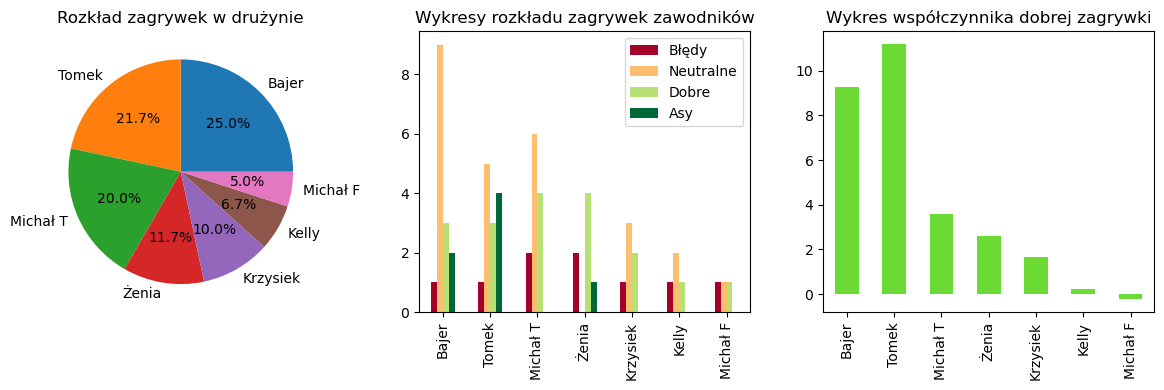

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

#Wykres kołowy rozkładu sumy zagrywek na zawodników
axs[0].pie(zgr1.loc["Wszystkie"], labels = zgr1.columns, autopct='%1.1f%%')
axs[0].set_title('Rozkład zagrywek w drużynie')

#Wykres rozkładu poziomu zagrywek zawodników
zgr1.loc[["Błędy", "Neutralne", "Dobre", "Asy"]].T.plot(kind="bar", ax = axs[1], colormap='RdYlGn')
axs[1].set_title('Wykresy rozkładu zagrywek zawodników')

#Wykres współczynnika poprawności zagrywki
zgr1.loc["WSP"].plot(kind="bar", ax = axs[2], color="#6BDA34")
axs[2].set_title('Wykres współczynnika dobrej zagrywki')

plt.tight_layout()
plt.show()

### Statystyki ataku
Analogicznie do poprzednich tabel. Skuteczność to % punktowych ataków, dobre ataki to punktowe + wymuszone ataki, a błędne to błędy w ataku + ataki zablokowane.

In [9]:
#Policzenie poszczególnych rang ataku dla każdego gracza
#Wyciągnięcie imion zawodników
a_players = list(at.columns)

#Wszystkie ataki zawodnika
suma_a = list(at.count())

#Wszystkie ataki drużyny
suma_w_a = sum(suma_a)

#Atak punktowy
at_p = list(at[at==2].count())

#Atak nieskończony, ale nie z swojej winy
at_mus = list(at[at==1].count())

#Ataki nieskończone
at_ns = list(at[at==0].count())

#Błedny atak (bez zablokowanych)
zle_at = list(at[at==-1].count())

#Atak zablokowany
at_blok = list(at[at==-2].count())

#Wyliczenie procentów skończonych ataków, błędów+zablokowań oraz wsp. dobrego ataku
skut = []
bledy_a = []
dobry_at = []
wsp_a = []

for i in range(len(at_p)) :
    skut.append(at_p[i]/suma_a[i]*100)
    skut[i] = round(skut[i], 1)
    dobry_at.append((at_p[i]+at_mus[i])/suma_a[i]*100)
    dobry_at[i] = round(dobry_at[i], 1)
    bledy_a.append((zle_at[i]+at_blok[i])/suma_a[i]*100)
    bledy_a[i] = round(bledy_a[i], 1)
    wsp_a.append((2*at_p[i]+1.5*at_mus[i]-3*(zle_at[i]+at_blok[i])+0.5)*2/5/suma_w_a*100)
    wsp_a[i] = round(wsp_a[i], 2)

#Utworzenie Data Frame z kolumnami zawodników i wierszami statystyk
rangi_at = [suma_a, at_p, at_mus, at_ns, zle_at, at_blok, skut, dobry_at, bledy_a, wsp_a]
idx_at = ["Wszystkie", "Punktowy", "Wymuszony", "Nieskończony", "Błąd", "Zablokowany", "% Skuteczność", "% Dobrego ataku", "% Błędów", "WSP"]

at1 = pd.DataFrame(rangi_at, columns=a_players, index = idx_at)
at1 = at1.sort_values(by=at1.index[0], axis=1, ascending=False)
at1

,Bajer,Żenia,Tomek,Michał T,Michał F,Kelly,Krzysiek
Wszystkie,15.00,13.00,13.00,5.00,4.00,3.00,2.00
Punktowy,9.00,7.00,2.00,0.00,1.00,1.00,0.00
Wymuszony,2.00,2.00,3.00,2.00,1.00,0.00,2.00
Nieskończony,3.00,1.00,3.00,3.00,0.00,1.00,0.00
Błąd,0.00,0.00,2.00,0.00,2.00,1.00,0.00
Zablokowany,1.00,3.00,3.00,0.00,0.00,0.00,0.00
% Skuteczność,60.00,53.80,15.40,0.00,25.00,33.30,0.00
% Dobrego ataku,73.30,69.20,38.50,40.00,50.00,33.30,100.00
% Błędów,6.70,23.10,38.50,0.00,50.00,33.30,0.00
WSP,13.45,6.18,-4.36,2.55,-1.45,-0.36,2.55


### Wizualizacja statystyk ataku

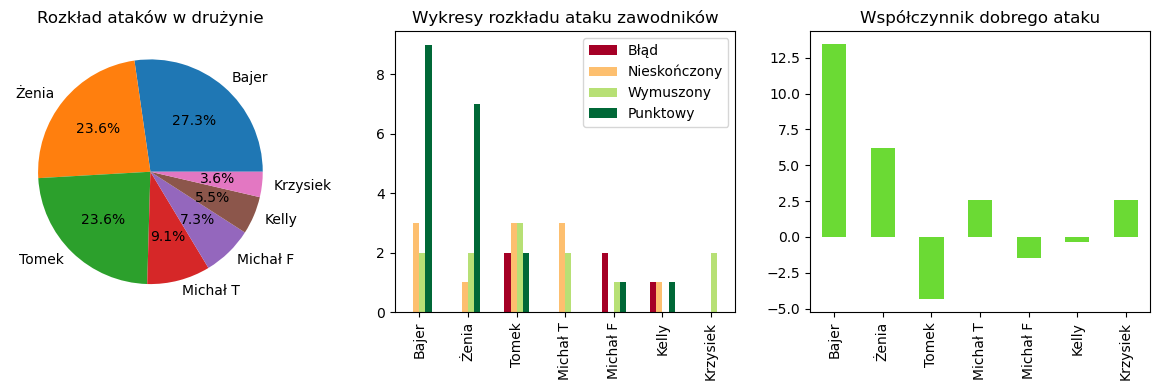

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

#Wykres rozkaładu sumy ataków na zawodników
axs[0].pie(at1.loc["Wszystkie"], labels = at1.columns, autopct='%1.1f%%')
axs[0].set_title('Rozkład ataków w drużynie')

#Wykres rozkładu skuteczności ataków każdego zawodnika
at1.loc[["Błąd", "Nieskończony", "Wymuszony", "Punktowy"]].T.plot(kind="bar", ax = axs[1], colormap='RdYlGn')
axs[1].set_title('Wykresy rozkładu ataku zawodników')

#Współczynnik dobrego ataku
at1.loc["WSP"].plot(kind="bar", ax=axs[2], color="#6BDA34")
axs[2].set_title("Współczynnik dobrego ataku")

plt.tight_layout()
plt.show()

### Statystyki bloku

In [11]:
#Imiona blokujących
b_players = list(bl.columns)

#Bloki punktowe
pkt_bl = list(bl[bl==1].count())

#Dobre wybloki
wybloki = list(bl[bl==0].count())

bl1 = pd.DataFrame([pkt_bl,wybloki], columns=b_players, index=["Punktowe", "Wybloki"])
bl1 = bl1.sort_values(by=bl1.index[0], axis=1, ascending=False)
bl1

,Kelly,Żenia,Michał F,Krzysiek,Michał T,Tomek
Punktowe,3,2,2,2,2,0
Wybloki,2,0,1,1,0,1


### Wizualizacja wszystkich statystyk na raz
Równocześnie otwierany jest zapis do pliku PDF, który będzie zawierał zarówno wykresy jak i wszystkie wcześniejsze tabele.

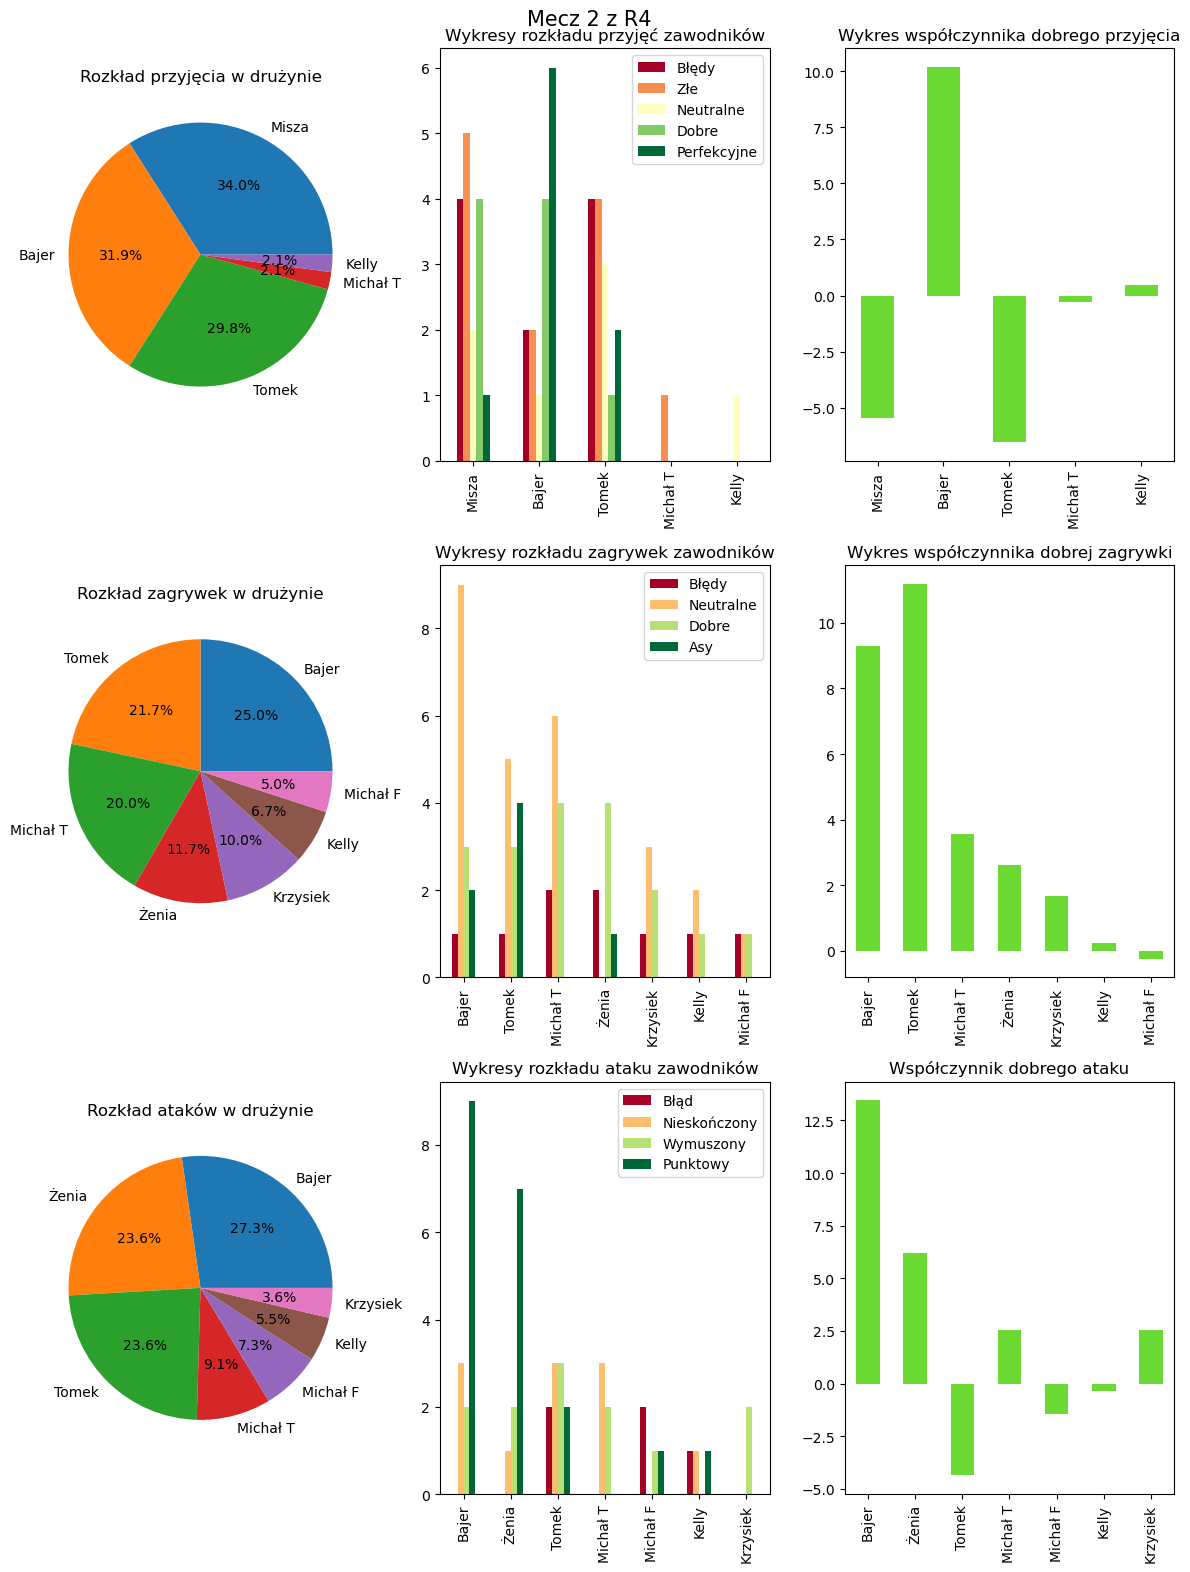

In [12]:
#Plik z zapisem do PDF
pp = PdfPages("Wszystko.pdf")

fig, axs = plt.subplots(3, 3, figsize=(12,16))

# Pieplot dla rozkładu przyjęć
axs[0,0].pie(p1.loc["Wszystkie"], labels = p1.columns, autopct='%1.1f%%')
axs[0,0].set_title('Rozkład przyjęcia w drużynie')

#Zestawienie rang przyjęć każdego zawodnika na jednym wykresie
p1.loc[["Błędy", "Złe", "Neutralne", "Dobre", "Perfekcyjne"]].T.plot(kind="bar", ax=axs[0,1], colormap='RdYlGn')
axs[0,1].set_title('Wykresy rozkładu przyjęć zawodników')

#Wykres słupkowy WSP przyjęcia
p1.loc["WSP"].plot(kind="bar", ax=axs[0,2], color="#6BDA34")
axs[0,2].set_title('Wykres współczynnika dobrego przyjęcia')

#Wykres kołowy rozkładu sumy zagrywek na zawodników
axs[1,0].pie(zgr1.loc["Wszystkie"], labels = zgr1.columns, autopct='%1.1f%%')
axs[1,0].set_title('Rozkład zagrywek w drużynie')

#Wykres rozkładu poziomu zagrywek zawodników
zgr1.loc[["Błędy", "Neutralne", "Dobre", "Asy"]].T.plot(kind="bar", ax = axs[1,1], colormap='RdYlGn')
axs[1,1].set_title('Wykresy rozkładu zagrywek zawodników')

#Wykres współczynnika poprawności zagrywki
zgr1.loc["WSP"].plot(kind="bar", ax = axs[1,2], color="#6BDA34")
axs[1,2].set_title('Wykres współczynnika dobrej zagrywki')

#Wykres rozkaładu sumy ataków na zawodników
axs[2,0].pie(at1.loc["Wszystkie"], labels = at1.columns, autopct='%1.1f%%')
axs[2,0].set_title('Rozkład ataków w drużynie')

#Wykres rozkładu skuteczności ataków każdego zawodnika
at1.loc[["Błąd", "Nieskończony", "Wymuszony", "Punktowy"]].T.plot(kind="bar", ax = axs[2,1], colormap='RdYlGn')
axs[2,1].set_title('Wykresy rozkładu ataku zawodników')

#Współczynnik dobrego ataku
at1.loc["WSP"].plot(kind="bar", ax=axs[2,2], color="#6BDA34")
axs[2,2].set_title("Współczynnik dobrego ataku")

plt.suptitle("Mecz 2 z R4", size = 15)

plt.tight_layout()
plt.savefig("Wykresy.jpeg")
pp.savefig(fig, bbox_inches='tight')

### Utworzenie tabelki do eksportu danych
Tworzona jest tabela, która może być wyeksportowana jako JPEG lub plik PDF.

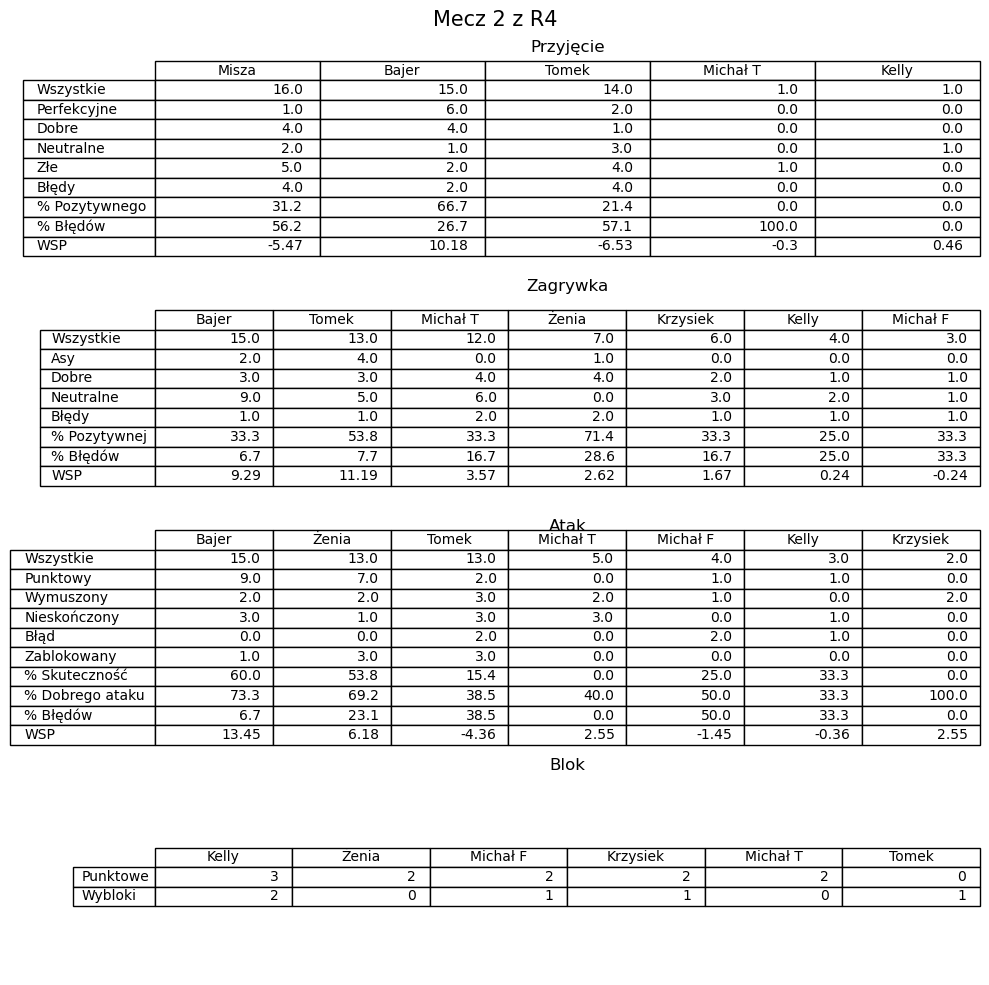

In [13]:
fig, axs = plt.subplots(4,1, figsize=(10,10))

axs[0].axis('off')
axs[0].table(cellText=p1.values, colLabels=p1.columns, rowLabels=idx, loc='center')
axs[0].set_title("Przyjęcie")

axs[1].axis('off')
axs[1].table(cellText=zgr1.values, colLabels=zgr1.columns, rowLabels=idx_zgr, loc='center')
axs[1].set_title("Zagrywka")

axs[2].axis('off')
axs[2].table(cellText=at1.values, colLabels=at1.columns, rowLabels=idx_at, loc='center')
axs[2].set_title("Atak")

axs[3].axis('off')
axs[3].table(cellText=bl1.values, colLabels=bl1.columns, rowLabels=["Punktowe", "Wybloki"], loc='center')
axs[3].set_title("Blok")

plt.suptitle("Mecz 2 z R4", size = 15)

plt.tight_layout()
plt.savefig("Statystyki.jpeg")

pp.savefig(fig, bbox_inches='tight')
pp.close()

### Utworzenie plików eksportujących dane z meczu do pliku sezonowego
Na końcu utworzone tabele przenoszone są do folderów przechowujących statystyki z całego sezonu.

In [ ]:
bl1.to_csv("../Sezon/Blok/Blok_R42.csv", encoding="utf-8", index=False)
at1.to_csv("../Sezon/Atak/Atak_r42.csv", encoding="utf-8", index=False)
p1.to_csv("../Sezon/Przyjęcie/Przyjęcie_R42.csv", encoding="utf-8", index=False)
zgr1.to_csv("../Sezon/Zagrywka/Zagrywka_R42.csv", encoding="utf-8", index=False)